# Задание 1

$$f(x) = \sin(x / 5)e^{x / 10} + 5 e{-x / 2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#функция, приближаемая полиномом степени 2
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов $A$ и свободный вектор $b$) для многочлена первой степени, который должен совпадать с функцией $f$ в точках 1 и 15. 

Решите данную систему с помощью функции `numpy.linalg.solve`. Нарисуйте функцию f и полученный многочлен.

## Линейное приближение

In [42]:
#задание матрицы коэффициентов и столбца свободных членов
x_0 = np.array([1, 15])
A = np.vander(x_0, increasing=True)
b = f(x_0)

In [43]:
A

array([[ 1,  1],
       [ 1, 15]])

In [44]:
coef = np.linalg.solve(A, b)

<ipython-input-45-4aba6ec1e222>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(x_grid, coef @ np.array([1, x_grid]), label='linear approximation')


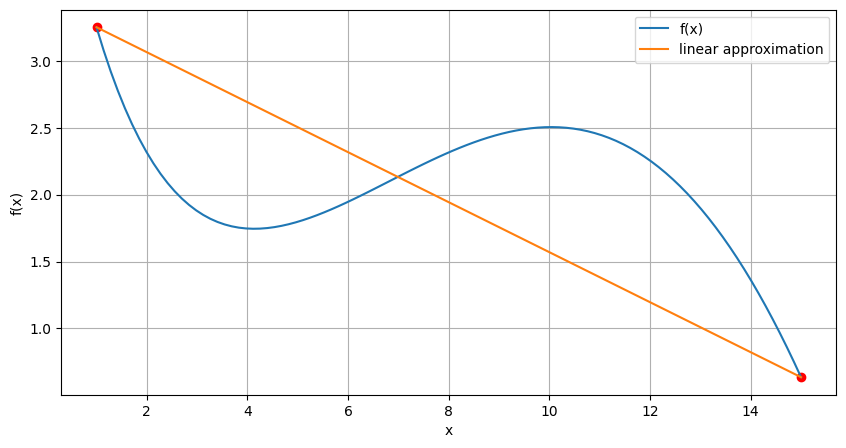

In [45]:
plt.figure(figsize=(10,5))

x_grid = np.linspace(1, 15, 100)

plt.plot(x_grid, f(x_grid), label='f(x)')
plt.plot(x_grid, coef @ np.array([1, x_grid]), label='linear approximation')
plt.scatter(x_0, f(x_0), color='r')

plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()
plt.show()

**Вывод:** линейное приближение не очень :(

## Квадратичное приближение

In [46]:
#задание матрицы коэффициентов и столбца свободных членов
x_0 = np.array([1, 8, 15])
A = np.vander(x_0, increasing=True)
b = f(x_0)

In [47]:
A

array([[  1,   1,   1],
       [  1,   8,  64],
       [  1,  15, 225]])

In [48]:
coef = np.linalg.solve(A, b)

<ipython-input-49-2de15803130d>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(x_grid, coef @ np.array([1, x_grid, x_grid**2]), label='quadratic approximation')


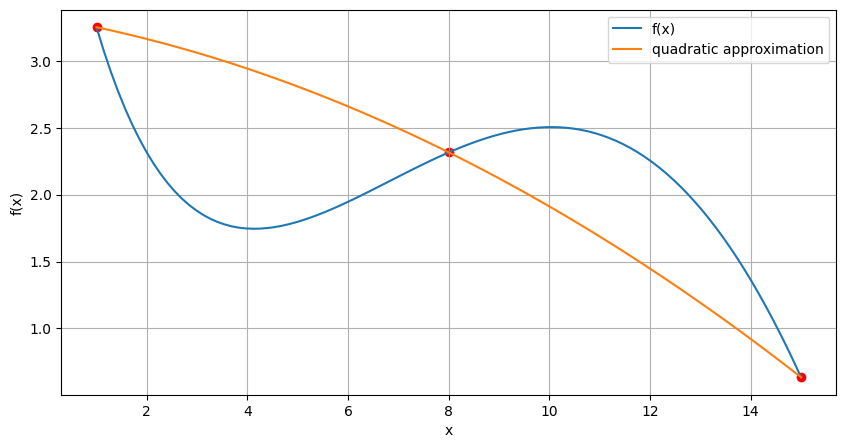

In [49]:
plt.figure(figsize=(10,5))

x_grid = np.linspace(1, 15, 100)

plt.plot(x_grid, f(x_grid), label='f(x)')
plt.plot(x_grid, coef @ np.array([1, x_grid, x_grid**2]), label='quadratic approximation')
plt.scatter(x_0, f(x_0), color='r')

plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()
plt.show()

**Вывод:** качество предсказания не улучшилось.

## Кубическая аппроксимация

In [50]:
#задание матрицы коэффициентов и столбца свободных членов
x_0 = np.array([1, 4, 10, 15])
A = np.vander(x_0, increasing=True)
b = f(x_0)

In [51]:
A

array([[   1,    1,    1,    1],
       [   1,    4,   16,   64],
       [   1,   10,  100, 1000],
       [   1,   15,  225, 3375]])

In [52]:
coef = np.linalg.solve(A, b)

<ipython-input-53-5deaafcf47bd>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(x_grid, coef @ np.array([1, x_grid, x_grid**2, x_grid**3]), label='cubic approximation')


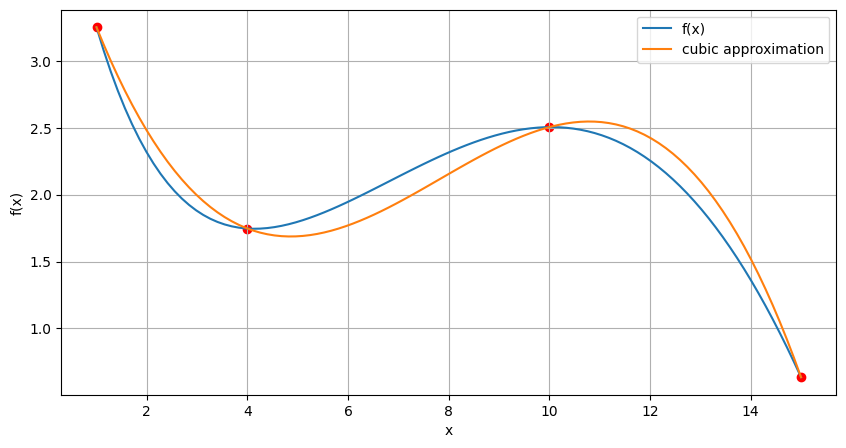

In [53]:
plt.figure(figsize=(10,5))

x_grid = np.linspace(1, 15, 100)

plt.plot(x_grid, f(x_grid), label='f(x)')
plt.plot(x_grid, coef @ np.array([1, x_grid, x_grid**2, x_grid**3]), label='cubic approximation')
plt.scatter(x_0, f(x_0), color='r')

plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.grid()
plt.show()

In [61]:
print(f'Коэффициенты: {coef}')

Коэффициенты: [ 4.36264154 -1.29552587  0.19333685 -0.00823565]


**Вывод:** предсказание стало гораздо лучше. Важна как степени многочлена, так и опорные точки.

# Задание 2

Есть два вектора одинаковой длины: $x$ и $y$. Надо найти количество позиций, для которых элементы в обоих векторах ненулевые. Число позиций, для которых хотя бы в одном из двух векторов $x$ и $y$ есть ненулевой элемент.

In [62]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])

#(оба ненулевые, хотя бы один нулевой)
print('Answer: ', np.sum((x != 0) * (y != 0)), np.sum((x != 0) + (y != 0)) )

Answer:  2 6


# Задание 3

В векторе $x$ надо повторить каждый элемент $N$ раз подряд.

In [67]:
np.ones(len(x) * N)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
x = np.array([1, 2, 0]) 
N = 3
'''
индексы нужных элементов
[0, 0, 0, 1, 1, 1, 2, 2, 2] длина периода N, а к-во периодов len(x)
'''
mask = (np.cumsum(np.ones(len(x) * N)) - 1) // len(x) 
print('Answer: ', x[mask.astype(int)] )

Answer:  [1 1 1 2 2 2 0 0 0]


# Задание 4

В векторе $x$ надо найти максимальный элемент среди тех, перед которыми стоит ноль.

In [68]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])

mask = np.append((x == 0)[1:], False)
print('Answer: ', max(x[mask]) )

Answer:  11


# Задание 5


В векторе $x$ надо заполнить каждый нулевой элемент предыдущим ненулевым значением.

Пришлось напрячься в этом задании, чтобы сделать подходящую маску.

In [106]:
x = np.array([8, 0, 0, 1, 0, 0, 0, -17.5, 0])

N = len(x)
mask = np.argmax((np.tri(N)*x != 0)*np.cumsum(np.ones(N)), axis=1)
x[mask]

array([  8. ,   8. ,   8. ,   1. ,   1. ,   1. ,   1. , -17.5, -17.5])

# Задание 6

Надо вычислить приближённое значение функции $f(x) = \ln(1 + x)$ в точке $x_0$ с помощью разложения в ряд Тейлора $N$-го порядка в окрестности нуля:

In [69]:
x0 = 1e-1
N = 7

row = np.cumsum(np.ones(N+1))
ln = np.sum( -(-x0)**row / row )  
print('Answer: ', ln )

Answer:  0.09531017970238095


# Задание 7

Попытавшись сравнить свой результат с работой `np.cov` получил отличие. Все дело оказалось в том, что `np.cov` по умолчанию использует степень свободы = 1. Далее вырезка со stackoverflow:

The variance is the average of the squared deviations from the mean,
i.e.,  ``var = mean(abs(x - x.mean())**2)``.
The mean is normally calculated as ``x.sum() / N``, where ``N = len(x)``.
If, however, `ddof` is specified, the divisor ``N - ddof`` is used
instead.  In standard statistical practice, ``ddof=1`` provides an
unbiased estimator of the variance of a hypothetical infinite population.
``ddof=0`` provides a maximum likelihood estimate of the variance for
normally distributed variables.

In [ ]:
x = np.random.randint(200, size = (3, 2))
x_mean = x.sum(axis=0) / np.shape(x)[0]
x_mean = x_mean.reshape(1, -1)

In [ ]:
print(x, 'матрица\n')
print(x_mean, 'выборочное среднее\n')
print( x.T@x/ np.shape(x)[0] - x_mean.T@x_mean, 'реализация матрицы ковариации\n')
print(np.cov(x.T, ddof=0), 'np.cov\n')

[[ 80  27]
 [ 84  79]
 [ 20 152]] матрица

[[61.33333333 86.        ]] выборочное среднее

[[  856.88888889 -1329.33333333]
 [-1329.33333333  2628.66666667]] реализация матрицы ковариации

[[  856.88888889 -1329.33333333]
 [-1329.33333333  2628.66666667]] np.cov



# Задание 9* (CNN)

Лаконичными методами numpy удалось свернуть шаблон (3,3) с одним блоком (3,3,3), а способ пройтись по все картинке без циклов никак не приходит в голову.

In [ ]:
def blur(input_path: str, output_path: str) -> None:
    img = plt.imread(input_path)

    #нарисуем исходное изображение
    plt.figure(figsize=(12,7))
    plt.imshow(img)
    plt.axis("off")

    kernel = np.array([[[
    [1, 1, 1],
    [1, 5, 1],
    [1, 1, 1]
    ]]]) / 13

    img * kernel

(682, 1024, 3)


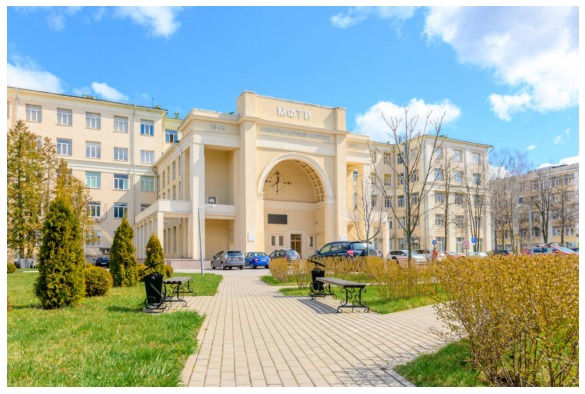

In [ ]:
blur(input_path = '/content/drive/MyDrive/Colab Notebooks/6_semester/ocr.jpg',
     output_path = '/content/drive/MyDrive/Colab Notebooks/6_semester/img.jpg')

array([175.        , 174.23076923, 174.        ])

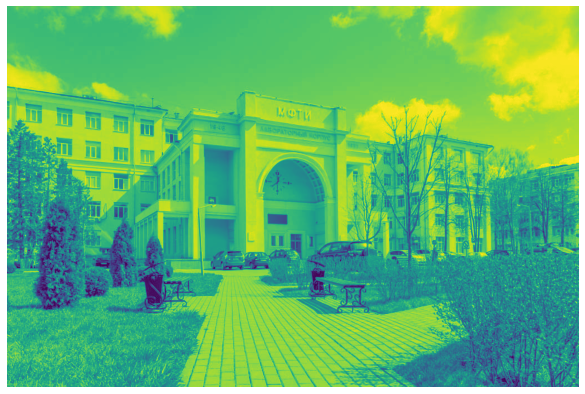

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/6_semester/ocr.jpg')
img = img[:, :, 1]

#нарисуем исходное изображение
plt.figure(figsize=(12,7))
plt.imshow(img)
plt.axis("off")

kernel = np.array([[[
[1, 1, 1],
[1, 5, 1],
[1, 1, 1]
]]]) / 13

np.sum( img[:3, :3] * kernel.reshape(3, 3, -1), axis=(0,1))

In [ ]:
kernel = np.array([[[
    [1, 1, 1],
    [1, 5, 1],
    [1, 6, 1]]]]) / 13

kernel = kernel.reshape(1, 1, 3, 3)*np.ones((5, 5, 3, 3))
img[(2, 3)] 

175